In [0]:
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data=load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [11]:
data.vocab.itos[:15]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of']

In [12]:
data.train_ds[0][0]

Text xxbos xxmaj if you really enjoyed the 2002 xxmaj resident xxmaj evil movie , then you should just see it instead of xxunk 2 hours you 'll never get back . i can not believe that no one has commented that this movie is just a cheap knock off of xxup re . xxmaj first , a " special " commando force is the unique defense for a facility with a computer matrix that has an xxup ai and xxunk xxunk . xxmaj and this " xxmaj xxunk " rip - off has a series of xxunk that inevitably kill off one member of the squad at a time . xxmaj there 's even a xxunk reference in the code names , which was in the dialog of xxup re . xxmaj despite the fact that there are no zombies , the " xxmaj xxunk " , the movie 's nemesis , is some sort of bio - creature , very xxunk in color xxunk xxunk xxunk , with a lot of cyborg xxunk just like a super mutant of xxup re . xxmaj so , a xxunk - of - the - finger to xxmaj mr. xxmaj richard xxmaj taylor for claiming any credit for this story . 
 
  xxmaj they are not the

In [13]:
data.train_ds[0][0].data[:10]

array([   2,    5,   57,   33,   85,  675,    9, 4657,    5, 3738])

In [15]:
data = (TextList.from_csv(path,'texts.csv',cols='text')
        .split_from_df(col=2)
        .label_from_df(cols=0)
        .databunch())

In [0]:
bs=32

In [17]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [18]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [19]:
data_lm= (TextList.from_folder(path)
          .filter_by_folder(include=['train','test','unsup'])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path,'data_lm.pkl', bs=bs)

In [21]:
data_lm.show_batch()

idx,text
0,"film but go nowhere . a gross example is the giant peach float , obviously left over from a town parade and donated by the local canning factory . xxmaj it was just too tempting to waste what was hopefully a free , but nevertheless irrelevant , prop ! xxmaj the peach is given a cursory , unexplained wash - down at one stage but that 's where it ends"
1,"what she does "" acting "" ) who always has roles with nudity in a shower scene , a man in a reptile suit almost modeled after predator , a cabin in the woods , etc . xxmaj but there are some redeeming points . xxmaj although the story is not new , for the most part , there 's a few parts that are n't so regurgitated . xxmaj"
2,"really bad ! ( xxmaj it 's actually so bad that i 'm not able to write a sentence without exclamation mark ! ) xxmaj if the first episode of xxunk xxmaj visiteurs ' was a quite good familial comedy with funny jokes and cult dialogues , this sequel is copying badly the receipe of the first one . xxmaj the funny parts could be counted on one hand and"
3,"sense . xxmaj as for myself , i 'd like to consider a title suggested by the murdered xxmaj dr. xxmaj xxunk 's experiment titled ' xxmaj group xxmaj stress xxmaj project ' . xxmaj it applies to the film 's actors and viewers alike . \n \n xxmaj keep an eye out just above xxmaj the xxmaj general 's head at poolside when he asks an agent for"
4,"xxup is xxmaj edward xxmaj rochester ... it 's that simple . i do n't care that other reviewers claim he 's too handsome . xxmaj dalton is attractive , certainly , but no pretty - boy . xxmaj in fact he possesses a craggy , angular dark charm that , in my mind , is quite in keeping with the mysterious , very masculine xxmaj mr xxup r. xxmaj"


In [22]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


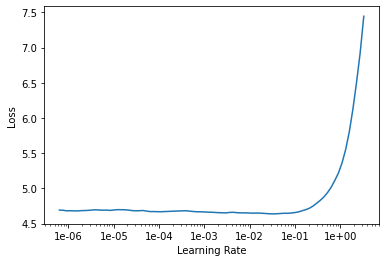

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.220405,4.109729,0.291293,1:45:21


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


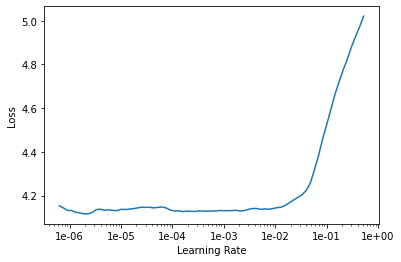

In [32]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
# ideally should have fine tuned further

In [0]:
# learn.fit_one_cycle(4, 1e-3, moms=(0.8,0.7))

In [0]:
# not doing because of GPU limitations

In [0]:
learn.save('fine-tuned')

In [0]:
learn.load('fine-tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS=40
N_SENTENCES = 2

In [42]:
print("\n".join(learn.predict(TEXT, N_WORDS,temperature=0.75) for _ in range(N_SENTENCES) ))

I liked this movie because she was younger at the time of the movie . i was hoping to see a similar movies TV series to get back to the " Wasting All Time " . She was , was
I liked this movie because it was very funny . And i was very disappointed . Otherwise i was expecting a lot of better movies . i was really disappointed . This one is a dirty movie , and it 's not


In [0]:
TEXT = "It was a disaster"
N_WORDS = 40

In [44]:
print(learn.predict(TEXT,N_WORDS, temperature=0.75))

It was a disaster of the first second , and this film is watchable and definitely worth watching . The only problem is i found myself laughing at the time it was the first of mine . The movie was very well


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [47]:
data_clas = (TextList.from_folder(path,vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder(classes= ['neg','pos'])
            .databunch(bs=bs))
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl',bs=bs)

In [49]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxmaj polish film maker xxmaj walerian xxmaj borowczyk 's xxmaj la xxmaj bête ( xxmaj french , 1975 , aka xxmaj the xxmaj beast ) is among the most controversial and brave films ever made and a very excellent one too . xxmaj this film tells everything that 's generally been hidden and denied about our nature and our sexual nature in particular with the symbolism and silence of",pos
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",pos
"xxbos xxmaj warning : xxmaj spoilers xxmaj galore ! \n \n xxmaj tim xxmaj burton remaking this sui generis movie is about as sensible as remaking xxmaj psycho - oh , that 's right , some idiot already did that - i rest my case . \n \n xxmaj movie opens with xxunk blundering a simulation , proving he 's not that smart from the outset . xxmaj",neg


In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5);
learn.load_encoder('fine_tuned_enc');

In [53]:
learn.lr_find()
learn.record.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


AttributeError: ignored

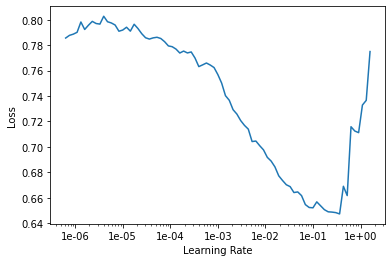

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.445263,0.382533,0.839520,23:47


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [59]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([9.0136e-04, 9.9910e-01]))

In [60]:
learn.predict("It was an okayish movie")

(Category pos, tensor(1), tensor([0.3645, 0.6355]))

In [61]:
learn.predict("It was a horrible movie")

(Category neg, tensor(0), tensor([0.8352, 0.1648]))

In [62]:
learn.predict("Action packed and thriller movie")

(Category pos, tensor(1), tensor([0.0019, 0.9981]))

In [63]:
learn.predict("The plot was inbalanced and rushed. But acting was good.")

(Category neg, tensor(0), tensor([0.7421, 0.2579]))

In [64]:
learn.predict("Not a family movie but decent acting and plot")

(Category pos, tensor(1), tensor([0.2589, 0.7411]))

In [65]:
learn.predict("Overhyped and didnt live up to its name")

(Category neg, tensor(0), tensor([0.5421, 0.4579]))

In [66]:
learn.predict("Teenage drifting seen as a form of forward momentum. Enjoyably playful.")

(Category pos, tensor(1), tensor([0.4443, 0.5557]))

In [68]:
learn.predict("'Avengers: Endgame', which marks the end of the Infinity Saga, is spellbounding and surely an enthralling experience. The last film of the 'Avengers' franchise is remarkable and doesn't disappoint.")

(Category pos, tensor(1), tensor([0.2363, 0.7637]))